In [ ]:
%matplotlib inline


# Nearest Neighbors Classification


Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.


Automatically created module for IPython interactive environment


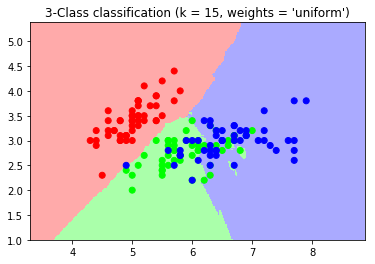

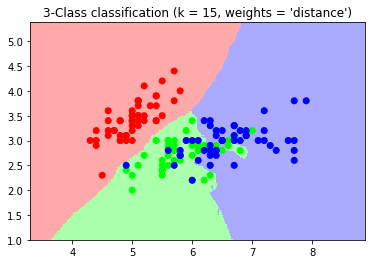

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target       # y represents the class, including 0, 1, 2, of an element in X 

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [21]:
xx.shape, yy.shape

((220, 280), (220, 280))

In [39]:
print(X.shape, y.shape)
print(xx.shape, yy.shape)
print(np.c_[xx.ravel(), yy.ravel()])

(150, 2) (150,)
(220, 280) (220, 280)
[[ 3.3   1.  ]
 [ 3.32  1.  ]
 [ 3.34  1.  ]
 ..., 
 [ 8.84  5.38]
 [ 8.86  5.38]
 [ 8.88  5.38]]


## Notes

### 1. About Original Code
```py
X = iris.data
y = iris.target
```
In this simple case, `X` represents the coordinates of points on the plain while `y` reserves the class of points. These are 150 **_sample points_**. 

```py
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
```
This creates a meshgrid, `xx` $\times$ `yy`, with more points based on `X`. Then

```py
np.c_[xx.ravel(), yy.ravel()]
```
generates coodinates of points on the plain according to `xx` and `yy`. These are the **_new points_** for `clf`, the kNN classifier to predict their class.

```py
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
```
`clf.predict()` returns the predicted results which consist of the classes of the **_new points_** in meshgrid.

### 2. If Applied to Indoor Localization
If kNN algorithm is applied to our Indoor Localization project, the **vector of RSSIs** corresponds to the **2D coordinates**  whilst the **locations** corresponds to **classes** in sample code.
</br>
**Vector of RSSIs** is just like the coordinates in a high-dementional space and maps a specified location in real world. 